In [1]:
# control panel

import json
import numpy as np
import tweepy as twee
import time

# twitter developer credentials
json_credentials_file = open('../local/credentials.json','r')
credentials = json.load(json_credentials_file)

auth = twee.OAuthHandler(credentials['consumer_key'], credentials['consumer_secret'])
auth.set_access_token(credentials['access_token'], credentials['access_token_secret'])
api = twee.API(auth)

# get local neighborhood for this user
reference_user = 'societyoftrees'
json_target_string = 'societyoftrees neighborhood.json' # json save file name



In [2]:
# helper functions


def get_friends(user):
    print "sleeping..."
    time.sleep(60)
    return api.friends_ids(user)

def get_followers(user):
    print "sleeping..."
    time.sleep(60)
    return api.followers_ids(user)

def mergeLists(list1, list2): # isn't there an array method for this. use it
    result = []
    for item in list1:
        if ~(item in result):
            result.append(item)
    for item in list2:
        if not(item in result):
            result.append(item)
    return result

def screen_name_to_vertex_index(screen_name):
    for idx,v in enumerate(vertices):
        if v['screen_name'] == screen_name:
            return idx

def edge_exists(source_user,target_user):
    for e in edges:
        if e['source']==source_user.screen_name:
            if e['target']==target_user.screen_name:
                return True
    return False


In [3]:
print "getting friends..."
friends_ids = get_friends(reference_user)
print "getting followers..."
followers_ids = get_followers(reference_user)
neighborhood_ids = mergeLists(friends_ids, followers_ids)
print "ok finished"


getting friends...
sleeping...
getting followers...
sleeping...
ok finished


In [4]:

vertices = [] # format for the json dump
for user_id in neighborhood_ids:
    user = api.get_user(user_id)
    
    print user.screen_name
    
    time.sleep(1) # 900 calls / 15 min allowed
    user_object = {"screen_name":user.screen_name,
                   "id:":user.id,                   
                   "friends_count":user.friends_count,
                   "followers_count":user.followers_count,                   
                   "verified":user.verified,
                   "utc_offset":user.utc_offset,
                   "statuses_count":user.statuses_count,
                   "profile_image_url":user.profile_image_url_https
    }
    vertices.append(user_object) # should probably use 'vertices' instead of 'vertex ids' below, sry


estebanmoro
NatashaBertrand
UChiUnited
kazweida
swin24
CahnEmily
tressiemcphd
PlusPrivacy
EasyCrypt_co
JasonLeopold
FeministGriote
MalwareJake
fchollet
Trzhean
jbouie
nhannahjones
coyotefe
gendietzel
xotyahmarie
ritaresarian
grace_hauck
pete_grieve
SamEyler
dribnet
databyler
hardmaru
juliacarriew
FloriandeLooij
currentmscook
processfairy
jsssms
john_majoreason
jojot_wilkie
Econ_Marshall
Sweetling
rolandscahill
anildash
Shugars
NUnetsi
IUNetSci
KimLeighPontin
nikwasi
sanitycheck99
JYSexton
yonathanseleshi
renato_mariotti
iamdylancurran
Ke_neil_we
Iamdavemac
emrazz
komainuOly
ndrew_lawrence
KFILE
RealChiYouth
ehananoki
Catte_Nappe
anirban_82
soniagupta504
iamacyborg
sarah_donaldson
RobertMaguire_
SmithSuelsmith
shanacarp
JessicaHuseman
yonatanzunger
practicallia
kGolid
toontone747
mrejfox
IBJIYONGI
d1gi
yasmind
evacide
romancortes
cacheflowe
schwanksta
can
gcorallo
hiral4congress
EFF
Cabbibo
___vassili
estevancarlos
ricardov_cl
nanoPlink
marcus_volz
zeynep
suzatmo1
BaronNoah
owdua
ericmi

In [5]:
N = len(vertices)
print str(N) + " total vertices"

out_degree = np.zeros((N,1))
in_degree = np.zeros((N,1))
for (idx,v) in enumerate(vertices):
    out_degree[idx] = v['followers_count']
    in_degree[idx] = v['friends_count']
    

277 total vertices


1752.0 3438.2 5424.4 9702.4


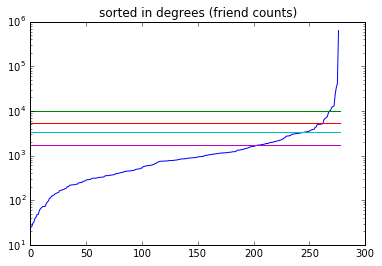

In [11]:
import matplotlib.pyplot as plt

sorted_degree = np.sort(in_degree, axis=0)
xval = np.arange(0,N)
at97pct = np.percentile(sorted_degree, 97)
at95pct = np.percentile(sorted_degree, 95)
at90pct = np.percentile(sorted_degree, 90)
at75pct = np.percentile(sorted_degree, 75)

print at75pct, at90pct, at95pct, at97pct

plt.figure()
plt.semilogy(xval, sorted_degree)
plt.semilogy([0, N],[at97pct, at97pct]) # format
plt.semilogy([0, N],[at95pct, at95pct]) # format
plt.semilogy([0, N],[at90pct, at90pct]) # format
plt.semilogy([0, N],[at75pct, at75pct]) # format
plt.title('sorted in degrees (friend counts)')
plt.show()



23921.0 112892.6 224991.4 368837.24


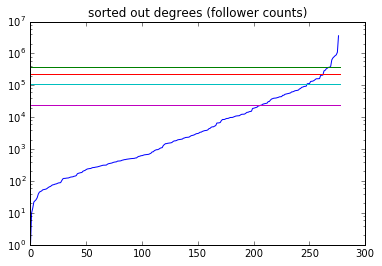

In [12]:
sorted_degree = np.sort(out_degree, axis=0)
xval = np.arange(0,N)
at97pct = np.percentile(sorted_degree, 97)
at95pct = np.percentile(sorted_degree, 95)
at90pct = np.percentile(sorted_degree, 90)
at75pct = np.percentile(sorted_degree, 75)

print at75pct, at90pct, at95pct, at97pct

plt.figure()
plt.semilogy(xval, sorted_degree)
plt.semilogy([0, N],[at97pct, at97pct]) # format
plt.semilogy([0, N],[at95pct, at95pct]) # format
plt.semilogy([0, N],[at90pct, at90pct]) # format
plt.semilogy([0, N],[at75pct, at75pct]) # format

plt.title('sorted out degrees (follower counts)')
plt.show()

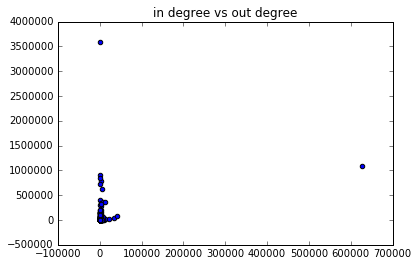

In [8]:
plt.figure()
plt.scatter(in_degree, out_degree)
plt.title('in degree vs out degree')
plt.show()